In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv("../datasets/indian_liver_patient.csv")


In [4]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
dataset.shape

(583, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
null_column = []
for i in dataset.columns:
  print(i,"\t-\t", dataset[i].isna().mean()*100)
  if dataset[i].isna().mean()*100 > 0:
    null_column.append(i)

Age 	-	 0.0
Gender 	-	 0.0
Total_Bilirubin 	-	 0.0
Direct_Bilirubin 	-	 0.0
Alkaline_Phosphotase 	-	 0.0
Alamine_Aminotransferase 	-	 0.0
Aspartate_Aminotransferase 	-	 0.0
Total_Protiens 	-	 0.0
Albumin 	-	 0.0
Albumin_and_Globulin_Ratio 	-	 0.6861063464837049
Dataset 	-	 0.0


In [8]:
for i in null_column:
  dataset[i] = dataset[i].fillna(dataset[i].mean())

for i in dataset.columns:
  print(i,"\t-\t", dataset[i].isna().mean()*100)

Age 	-	 0.0
Gender 	-	 0.0
Total_Bilirubin 	-	 0.0
Direct_Bilirubin 	-	 0.0
Alkaline_Phosphotase 	-	 0.0
Alamine_Aminotransferase 	-	 0.0
Aspartate_Aminotransferase 	-	 0.0
Total_Protiens 	-	 0.0
Albumin 	-	 0.0
Albumin_and_Globulin_Ratio 	-	 0.0
Dataset 	-	 0.0


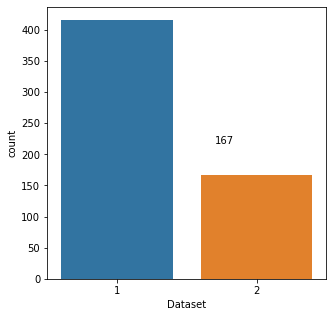

In [9]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Dataset', data=dataset)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [10]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler()
x, y = oversampler.fit_resample(dataset.drop(['Dataset'], axis=1), dataset['Dataset'])

new_dataset = pd.DataFrame(x, columns=dataset.drop(['Dataset'], axis=1).columns)
new_dataset['Dataset'] = y

new_dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


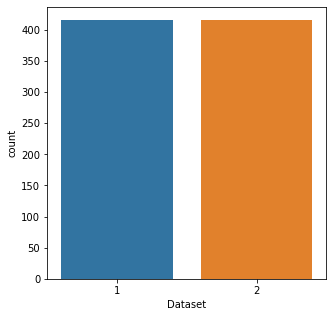

In [11]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Dataset', data=new_dataset)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [12]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
new_dataset['Gender'] = enc.fit_transform(new_dataset['Gender'].astype('str'))

In [13]:
new_dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [14]:
new_dataset.shape

(832, 11)

In [15]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         832 non-null    int64  
 1   Gender                      832 non-null    int32  
 2   Total_Bilirubin             832 non-null    float64
 3   Direct_Bilirubin            832 non-null    float64
 4   Alkaline_Phosphotase        832 non-null    int64  
 5   Alamine_Aminotransferase    832 non-null    int64  
 6   Aspartate_Aminotransferase  832 non-null    int64  
 7   Total_Protiens              832 non-null    float64
 8   Albumin                     832 non-null    float64
 9   Albumin_and_Globulin_Ratio  832 non-null    float64
 10  Dataset                     832 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 68.4 KB


In [16]:
X = new_dataset.drop(['Dataset'], axis=1)
y = new_dataset['Dataset']

In [17]:

from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel

feture_el_model  = SelectFromModel(Lasso(alpha=0.005 ,random_state =42))

feture_el_model.fit(X,y)
feture_el_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

In [18]:
cols= X.columns
selected_feature = cols[feture_el_model.get_support()]
print('total_features {}' .format(X.shape[1]))
print('total_features {}' .format(len(selected_feature)))
X= X[selected_feature]

total_features 10
total_features 9


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model=LogisticRegression()

In [21]:
logistic_regression_model.fit(X_train,y_train)

LogisticRegression()

In [22]:
LR_prediction=logistic_regression_model.predict(X_test)

In [23]:
print('Logistic Regression')
print('Accuracy= ',accuracy_score(LR_prediction,y_test)*100)
print(classification_report(y_test,LR_prediction))

Logistic Regression
Accuracy=  73.05389221556887
              precision    recall  f1-score   support

           1       0.75      0.63      0.69        78
           2       0.72      0.82      0.76        89

    accuracy                           0.73       167
   macro avg       0.73      0.72      0.72       167
weighted avg       0.73      0.73      0.73       167



In [24]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model=DecisionTreeClassifier()

In [25]:
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
DT_prediction=decision_tree_model.predict(X_test)

In [27]:
print('Decision Tree')
print('Accuracy= ',accuracy_score(DT_prediction,y_test)*100)
print(classification_report(y_test,DT_prediction))

Decision Tree
Accuracy=  85.02994011976048
              precision    recall  f1-score   support

           1       0.90      0.77      0.83        78
           2       0.82      0.92      0.87        89

    accuracy                           0.85       167
   macro avg       0.86      0.85      0.85       167
weighted avg       0.86      0.85      0.85       167



In [28]:
from sklearn.svm import SVC
support_vector_model=SVC()

In [29]:
support_vector_model.fit(X_train,y_train)

SVC()

In [30]:
SVM_prediction=support_vector_model.predict(X_test)

In [31]:
print('Support Vector Machine')
print('Accuracy=',accuracy_score(y_test,SVM_prediction)*100)
print(classification_report(y_test,SVM_prediction))

Support Vector Machine
Accuracy= 65.86826347305389
              precision    recall  f1-score   support

           1       0.66      0.55      0.60        78
           2       0.66      0.75      0.70        89

    accuracy                           0.66       167
   macro avg       0.66      0.65      0.65       167
weighted avg       0.66      0.66      0.65       167



In [32]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier()

In [33]:
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
RF_predict=random_forest_model.predict(X_test)

In [35]:
print('Random Forest')
print('Accuracy=',accuracy_score(y_test,RF_predict)*100)
print(classification_report(y_test,RF_predict))

Random Forest
Accuracy= 86.82634730538922
              precision    recall  f1-score   support

           1       0.91      0.79      0.85        78
           2       0.84      0.93      0.88        89

    accuracy                           0.87       167
   macro avg       0.88      0.86      0.87       167
weighted avg       0.87      0.87      0.87       167



In [36]:
random_forest_improved_model=RandomForestClassifier(n_estimators=10)
random_forest_improved_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [37]:
Rf_improved_predict=random_forest_improved_model.predict(X_test)

In [38]:
print('Improved Random Forest')
print('Accuracy=',accuracy_score(y_test,Rf_improved_predict)*100)
print(classification_report(y_test,Rf_improved_predict))

Improved Random Forest
Accuracy= 89.22155688622755
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        78
           2       0.90      0.90      0.90        89

    accuracy                           0.89       167
   macro avg       0.89      0.89      0.89       167
weighted avg       0.89      0.89      0.89       167



In [39]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()

In [40]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
KNN_prediction=KNN_model.predict(X_test)

In [42]:
print('KNN')
print('Accuracy=',accuracy_score(y_test,KNN_prediction)*100)
print(classification_report(y_test,KNN_prediction))

KNN
Accuracy= 74.25149700598801
              precision    recall  f1-score   support

           1       0.72      0.73      0.73        78
           2       0.76      0.75      0.76        89

    accuracy                           0.74       167
   macro avg       0.74      0.74      0.74       167
weighted avg       0.74      0.74      0.74       167



In [43]:
import joblib

In [44]:
X_test

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin
224,70,1,1.7,0.5,400,56,44,5.7,3.1
758,20,0,0.6,0.2,202,12,13,6.1,3.0
173,31,1,0.6,0.1,175,48,34,6.0,3.7
673,48,0,0.9,0.2,175,24,54,5.5,2.7
545,45,0,0.7,0.2,153,41,42,4.5,2.2
...,...,...,...,...,...,...,...,...,...
824,70,1,1.4,0.6,146,12,24,6.2,3.8
612,35,1,0.8,0.2,198,36,32,7.0,4.0
810,36,1,5.3,2.3,145,32,92,5.1,2.6
54,42,1,8.9,4.5,272,31,61,5.8,2.0


In [45]:
X_test.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin'],
      dtype='object')

In [46]:
Rf_improved_predict

array([1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2], dtype=int64)

In [47]:
y_test

224    1
758    2
173    1
673    2
545    2
      ..
824    2
612    2
810    2
54     1
667    2
Name: Dataset, Length: 167, dtype: int64

In [48]:
X_train

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin
632,65,1,0.7,0.2,265,30,28,5.2,1.8
806,48,0,0.9,0.2,175,24,54,5.5,2.7
683,48,1,0.7,0.2,208,15,30,4.6,2.1
228,65,0,1.0,0.3,202,26,13,5.3,2.6
256,50,1,0.9,0.3,901,23,17,6.2,3.5
...,...,...,...,...,...,...,...,...,...
305,54,0,1.4,0.7,195,36,16,7.9,3.7
192,60,1,2.3,0.6,272,79,51,6.6,3.5
16,38,1,1.8,0.8,342,168,441,7.6,4.4
217,49,1,1.1,0.5,159,30,31,7.0,4.3


In [49]:
y_train

632    2
806    2
683    2
228    2
256    1
      ..
305    2
192    1
16     1
217    1
410    1
Name: Dataset, Length: 665, dtype: int64

In [50]:
X_test

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin
224,70,1,1.7,0.5,400,56,44,5.7,3.1
758,20,0,0.6,0.2,202,12,13,6.1,3.0
173,31,1,0.6,0.1,175,48,34,6.0,3.7
673,48,0,0.9,0.2,175,24,54,5.5,2.7
545,45,0,0.7,0.2,153,41,42,4.5,2.2
...,...,...,...,...,...,...,...,...,...
824,70,1,1.4,0.6,146,12,24,6.2,3.8
612,35,1,0.8,0.2,198,36,32,7.0,4.0
810,36,1,5.3,2.3,145,32,92,5.1,2.6
54,42,1,8.9,4.5,272,31,61,5.8,2.0


In [51]:
new_dataset.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.070065,0.040271,0.039894,0.076730,-0.053246,0.000618,-0.178511,-0.251413,-0.189755,-0.182833
Gender,0.070065,1.000000,0.101631,0.113946,0.025347,0.087737,0.085738,-0.041915,-0.046096,0.021238,-0.123622
Total_Bilirubin,0.040271,0.101631,1.000000,0.880829,0.237192,0.236432,0.257946,-0.012650,-0.208905,-0.205397,-0.286496
Direct_Bilirubin,0.039894,0.113946,0.880829,1.000000,0.267485,0.257547,0.278760,-0.006444,-0.216183,-0.203918,-0.317822
Alkaline_Phosphotase,0.076730,0.025347,0.237192,0.267485,1.000000,0.148648,0.178550,-0.031171,-0.167415,-0.238527,-0.225694
Alamine_Aminotransferase,-0.053246,0.087737,0.236432,0.257547,0.148648,1.000000,0.794793,-0.032455,-0.038847,-0.022993,-0.214408
Aspartate_Aminotransferase,0.000618,0.085738,0.257946,0.278760,0.178550,0.794793,1.000000,-0.023511,-0.088269,-0.079154,-0.198295
Total_Protiens,-0.178511,-0.041915,-0.012650,-0.006444,-0.031171,-0.032455,-0.023511,1.000000,0.808069,0.275185,0.014957
Albumin,-0.251413,-0.046096,-0.208905,-0.216183,-0.167415,-0.038847,-0.088269,0.808069,1.000000,0.708161,0.167492
Albumin_and_Globulin_Ratio,-0.189755,0.021238,-0.205397,-0.203918,-0.238527,-0.022993,-0.079154,0.275185,0.708161,1.000000,0.191851


In [52]:
new_dataset.corr(method='pearson')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.070065,0.040271,0.039894,0.076730,-0.053246,0.000618,-0.178511,-0.251413,-0.189755,-0.182833
Gender,0.070065,1.000000,0.101631,0.113946,0.025347,0.087737,0.085738,-0.041915,-0.046096,0.021238,-0.123622
Total_Bilirubin,0.040271,0.101631,1.000000,0.880829,0.237192,0.236432,0.257946,-0.012650,-0.208905,-0.205397,-0.286496
Direct_Bilirubin,0.039894,0.113946,0.880829,1.000000,0.267485,0.257547,0.278760,-0.006444,-0.216183,-0.203918,-0.317822
Alkaline_Phosphotase,0.076730,0.025347,0.237192,0.267485,1.000000,0.148648,0.178550,-0.031171,-0.167415,-0.238527,-0.225694
Alamine_Aminotransferase,-0.053246,0.087737,0.236432,0.257547,0.148648,1.000000,0.794793,-0.032455,-0.038847,-0.022993,-0.214408
Aspartate_Aminotransferase,0.000618,0.085738,0.257946,0.278760,0.178550,0.794793,1.000000,-0.023511,-0.088269,-0.079154,-0.198295
Total_Protiens,-0.178511,-0.041915,-0.012650,-0.006444,-0.031171,-0.032455,-0.023511,1.000000,0.808069,0.275185,0.014957
Albumin,-0.251413,-0.046096,-0.208905,-0.216183,-0.167415,-0.038847,-0.088269,0.808069,1.000000,0.708161,0.167492
Albumin_and_Globulin_Ratio,-0.189755,0.021238,-0.205397,-0.203918,-0.238527,-0.022993,-0.079154,0.275185,0.708161,1.000000,0.191851


In [53]:
new_dataset.to_csv('latest_oversampled_data.csv')

In [54]:
joblib.dump(random_forest_improved_model,'Improved_2_Random_Forest_Model_Liver_disease.pkl')

['Improved_2_Random_Forest_Model_Liver_disease.pkl']

In [63]:
importance = random_forest_improved_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d (%s), Score: %.5f' % (i,new_dataset.columns[i],v))

Feature: 0 (Age), Score: 0.11863
Feature: 1 (Gender), Score: 0.01789
Feature: 2 (Total_Bilirubin), Score: 0.13801
Feature: 3 (Direct_Bilirubin), Score: 0.08636
Feature: 4 (Alkaline_Phosphotase), Score: 0.16362
Feature: 5 (Alamine_Aminotransferase), Score: 0.11870
Feature: 6 (Aspartate_Aminotransferase), Score: 0.16586
Feature: 7 (Total_Protiens), Score: 0.09317
Feature: 8 (Albumin), Score: 0.09777


In [60]:
import matplotlib.pyplot as plt

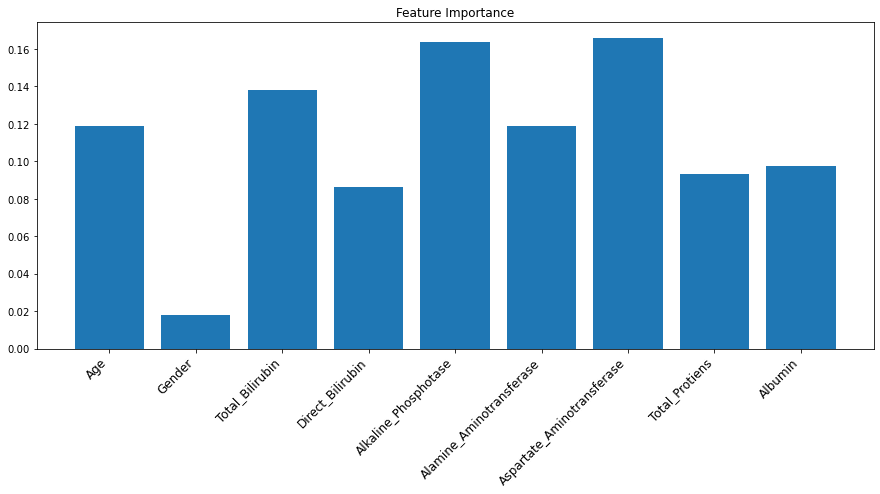

In [88]:
f = plt.figure()
plt.title("Feature Importance")
matplotlib.rc('xtick', labelsize=12)
plt.xticks(rotation=45, ha='right')
f.set_figwidth(15)
f.set_figheight(6)
plt.bar([new_dataset.columns[x] for x in range(len(importance))], importance)

plt.show()

In [90]:
X_test

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin
224,70,1,1.7,0.5,400,56,44,5.7,3.1
758,20,0,0.6,0.2,202,12,13,6.1,3.0
173,31,1,0.6,0.1,175,48,34,6.0,3.7
673,48,0,0.9,0.2,175,24,54,5.5,2.7
545,45,0,0.7,0.2,153,41,42,4.5,2.2
...,...,...,...,...,...,...,...,...,...
824,70,1,1.4,0.6,146,12,24,6.2,3.8
612,35,1,0.8,0.2,198,36,32,7.0,4.0
810,36,1,5.3,2.3,145,32,92,5.1,2.6
54,42,1,8.9,4.5,272,31,61,5.8,2.0


In [93]:
print('Original Features in the Dataset: ')
for i in new_dataset.columns:
    print(i)

Original Features in the Dataset: 
Age
Gender
Total_Bilirubin
Direct_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio
Dataset


In [100]:
print('Features Selected after Feature Selection:')
for i in range(len(feture_el_model.get_support())):
               if feture_el_model.get_support()[i]==True:
                   print(new_dataset.columns[i])

Features Selected after Feature Selection:
Age
Gender
Total_Bilirubin
Direct_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Protiens
Albumin
